In [1]:
import numpy as np

In [15]:
def kmeans(X,C):
    assert X.shape[1] == C.shape[1]
    while True:
        new_assignments = nearest_cluster(X,C)
        try:
            if np.all(new_assignments == assignments):
                return assignments, C
        except NameError:
            pass
        assignments = new_assignments
        C= compute_centroids(X,assignments)


In [26]:
def nearest_cluster(X,C):
    dist = np.linalg.norm(X[:,None,:] - C[None,:,:],axis = 2)
    return np.argmin(dist,axis = 1)

In [19]:
def compute_centroids(X,a):
    c = np.arange(a.max()+1)
    z = a[:,None,None] == c[None,:,None]
    return (X[:,None]*z).sum(axis =0)/z.sum(axis =0)


In [55]:
def kmeanspp(X,k,rng):
    n,p = X.shape
    C = np.zeros((k,p))
    j = rng.choice(n)
    C[0] = X[j]
    
    for i in range(1,k):
        dist = np.linalg.norm(X[:,None,:]-C[None,:i,:], axis = 2)
        d = dist.min(1)
        w = d**2
        w /= w.sum()
        j = rng.choice(n,p=w)
        C[i] = X[j]
    return C

In [6]:
def V(X,a,C):
    return np.sum((X-C[a])**2)

In [7]:
C = np.array([[2,2,2],[1,1,1],[3,3,3]])
a = np.array([2,1,0,0,1,2])
C[a]

array([[3, 3, 3],
       [1, 1, 1],
       [2, 2, 2],
       [2, 2, 2],
       [1, 1, 1],
       [3, 3, 3]])

In [10]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_


array([[10.,  2.],
       [ 1.,  2.]])

In [24]:
rng = np.random.default_rng(1)
C0 = kmeanspp(X,2,rng)
clst = kmeans(X,C0)
clst

(array([0, 0, 0, 1, 1, 1], dtype=int64),
 array([[ 1.,  2.],
        [10.,  2.]]))

In [42]:
from sklearn.datasets import make_blobs
import pandas as pd

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)
# make as panda dataframe for easy understanding
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head(2)

,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673


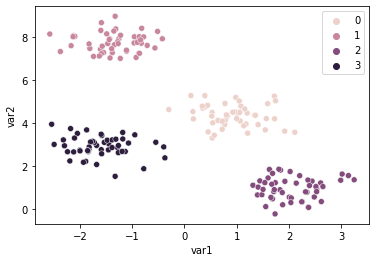

In [54]:
p = KMeans(n_clusters=4, init='k-means++', random_state=1).fit(df)
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="var1", y="var2", hue=p.labels_)
plt.show()

<AxesSubplot:xlabel='var1', ylabel='var2'>

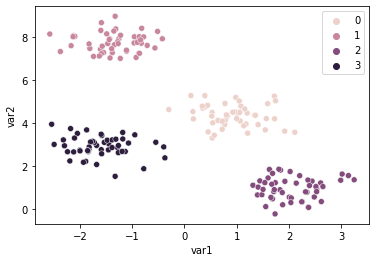

In [59]:
rng = np.random.default_rng(1)
C0 = kmeanspp(df.values,4,rng)
l,centroids = kmeans(df.values,C0)
sns.scatterplot(data=df, x="var1", y="var2", hue=l)

In [63]:
a= l

In [65]:
c = np.arange(a.max()+1)
z = a[:,None,None] == c[None,:,None]
z.shape

(200, 4, 1)

In [73]:
df.values[:,None,:].shape

(200, 1, 2)

In [ ]:
    c = np.arange(a.max()+1)
    z = a[:,None,None] == c[None,:,None]
    return (X[:,None]*z).sum(axis =0)/z.sum(axis =0)

In [74]:
z[0,:,:]

array([[False],
       [False],
       [ True],
       [False]])

In [75]:
X = df.values[:,None,:]

In [76]:
x = X[0,:,:]
x

array([[2.20438661, 1.56085661]])

In [77]:
x*z[0,:,:]

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [2.20438661, 1.56085661],
       [0.        , 0.        ]])

In [79]:
2.2*True

2.2